In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [2]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
X_train_flat = X_train.reshape(len(X_train) , 28*28)
X_test_flat = X_test.reshape(len(X_test) , 28*28)
X_train_flat = StandardScaler().fit_transform(X_train_flat)
X_test_flat = StandardScaler().fit_transform(X_test_flat)

In [8]:
X_train_flat[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41807799e-03, -5.75481961e-03, -4.08251693e-03, -4.08251693e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -4.70968827e-03, -8.79934640e-03, -1.15905591e-02,
       -1.47589798e-02, -1.92848546e-02, -2.46717975e-02, -2.90710271e-02,
       -3.05926583e-02, -3.11640127e-02, -3.19628719e-02, -3.02025355e-02,
       -3.13102175e-02, -2.83833960e-02, -2.31191906e-02, -1.91666260e-02,
       -1.67723008e-02, -1.09963601e-02, -8.32486080e-03, -4.38069356e-03,
        0.00000000e+00,  

In [9]:
model = keras.Sequential(
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

model.fit(X_train_flat, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4419 - accuracy: 0.8857
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3280 - accuracy: 0.9174
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3023 - accuracy: 0.9221
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2873 - accuracy: 0.9256
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2766 - accuracy: 0.9261
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.9277
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2625 - accuracy: 0.9284
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9294
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2564 - accuracy: 0.9296
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.254

In [10]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.9224


[0.42128604650497437, 0.9223999977111816]

In [11]:
y_predicted = model.predict(X_test_flat)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_predicted[0]

array([9.0492636e-01, 5.2997625e-06, 1.7742021e-06, 9.9990845e-01,
       4.1815951e-02, 9.6278775e-01, 4.5361556e-04, 9.9999952e-01,
       8.1396294e-01, 9.9579966e-01], dtype=float32)

In [13]:
y_max_predicted = [np.argmax(i) for i in y_predicted]

In [14]:
cm = tf.math.confusion_matrix(y_test , y_max_predicted,)

<AxesSubplot:>

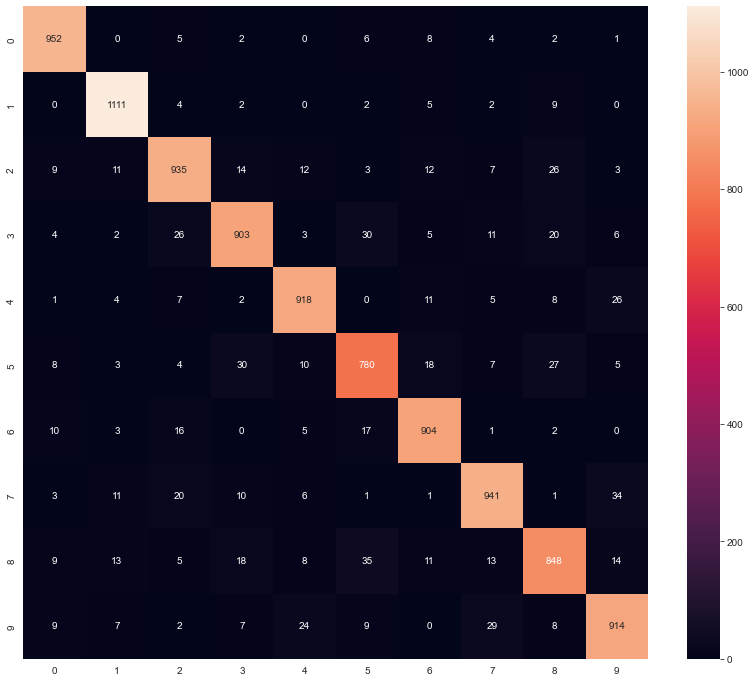

In [17]:
plt.figure(figsize=(14,12))
sn.heatmap(cm,annot = True, fmt='d')